In [2]:
#---------------------------------------------------
#导入库
#----------------数据探索----------------
import pandas as pd
import numpy as np
from tqdm import tqdm
#----------------核心模型----------------
import lightgbm as lgb
#----------------忽略报警----------------
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('GAIDC_preliminary_A/train.csv')
#test_df = pd.read_csv('GAIDC_preliminary_A/preliminary_A.csv')
test_df = pd.read_csv('GAIDC preliminary B_2-13/preliminary_B.csv')

In [6]:
test_dfA.describe()

,month,is_weekend,L1,L2,L3,L4,L5,L6
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,6.290000,0.355000,20.883898,22.315322,-0.117055,4.648385,3.977549,-0.849106
std,3.522384,0.478538,17.169153,21.829926,5.645215,5.236816,4.823464,5.301945
min,1.000000,0.000000,-20.529300,-22.546700,-13.560800,-6.617800,-5.119600,-31.462000
25%,3.000000,0.000000,8.205600,5.526000,-4.898675,0.293250,0.444400,-1.268600
50%,6.000000,0.000000,14.836100,10.998050,2.467400,3.107100,2.292050,0.624250
75%,10.000000,1.000000,33.936825,40.664275,3.465300,7.288200,8.551300,1.097000
max,12.000000,1.000000,107.600200,88.298500,15.379500,35.601700,27.905400,3.107900


<AxesSubplot:ylabel='Density'>

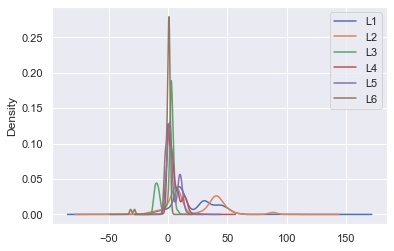

In [17]:
test_dfA[['L1','L2','L3',"L4",'L5','L6']].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

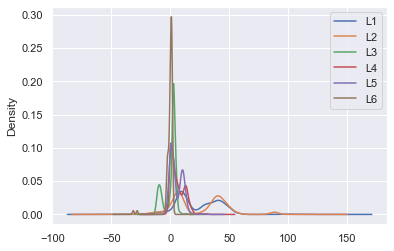

In [18]:
test_dfB[['L1','L2','L3',"L4",'L5','L6']].plot(kind='kde')

<AxesSubplot:xlabel='L1', ylabel='Density'>

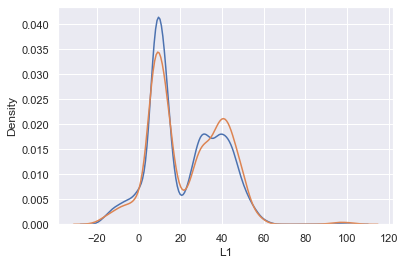

In [25]:
sns.kdeplot(train_df['L1'],label='train')
sns.kdeplot(test_df['L1'],label='test')

<AxesSubplot:xlabel='L2', ylabel='Density'>

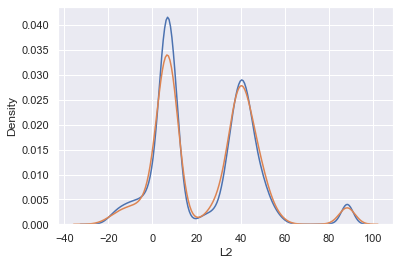

In [26]:
sns.kdeplot(train_df['L2'],label='train')
sns.kdeplot(test_df['L2'],label='test')

<AxesSubplot:xlabel='L3', ylabel='Density'>

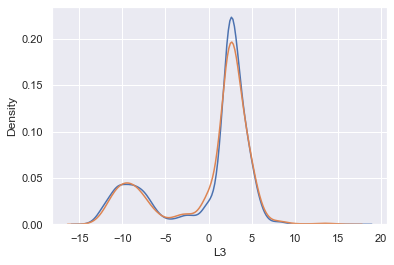

In [27]:
sns.kdeplot(train_df['L3'],label='train')
sns.kdeplot(test_df['L3'],label='test')

<AxesSubplot:ylabel='Density'>

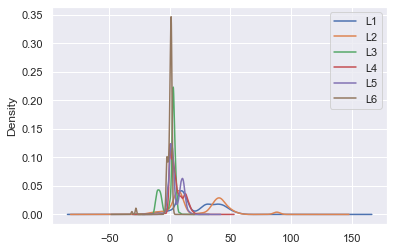

In [21]:
train_df[['L1','L2','L3',"L4",'L5','L6']].plot(kind='kde')

In [8]:
test_dfB

,id,transformers,date_id,month,is_weekend,time,L1,L2,L3,L4,L5,L6
0,M1_D00002_00_00,M1,D00002,5,0,0:00,14.5017,9.7903,4.4622,5.5257,2.8609,1.3864
1,M1_D00002_00_30,M1,D00002,5,0,0:30,14.9038,10.3050,4.4771,5.7268,3.4292,1.3706
2,M1_D00002_01_00,M1,D00002,5,0,1:00,15.5391,11.1052,4.4623,6.0284,3.5363,1.3861
3,M1_D00002_01_30,M1,D00002,5,0,1:30,15.0372,10.1807,4.4017,6.2629,3.7489,1.3865
4,M1_D00002_02_00,M1,D00002,5,0,2:00,13.3964,9.0974,4.4472,5.3921,3.2870,1.4170
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,M2_D00722_21_30,M2,D00722,5,1,21:30,27.6020,38.8685,-11.0236,6.4500,7.6799,-1.6738
9596,M2_D00722_22_00,M2,D00722,5,1,22:00,28.3978,38.9222,-10.1708,7.2882,8.1623,-1.6735
9597,M2_D00722_22_30,M2,D00722,5,1,22:30,26.3453,37.5952,-10.8101,6.7017,7.8141,-1.6740
9598,M2_D00722_23_00,M2,D00722,5,1,23:00,27.5600,37.9836,-10.2243,7.0369,7.9881,-1.6738


In [3]:
from catboost import CatBoostClassifier

from catboost import CatBoostRegressor
import xgboost as xgb


In [4]:
train_df

,id,transformers,date_id,month,is_weekend,time,L1,L2,L3,L4,L5,L6,y
0,M1_D00003_00_00,M1,D00003,4,0,0:00,16.4772,11.6558,4.4320,6.4635,4.3713,1.1885,9.7434
1,M1_D00003_00_30,M1,D00003,4,0,0:30,16.2091,11.8867,4.4020,6.4640,4.6197,1.1879,9.9550
2,M1_D00003_01_00,M1,D00003,4,0,1:00,15.9085,11.5495,4.3407,6.5308,4.0870,1.1272,10.1302
3,M1_D00003_01_30,M1,D00003,4,0,1:30,15.7744,11.3179,4.2491,6.0959,4.1756,1.0818,10.5524
4,M1_D00003_02_00,M1,D00003,4,0,2:00,15.6739,11.4603,4.3714,6.6315,4.2463,1.1573,10.3770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,M2_D00720_21_30,M2,D00720,1,0,21:30,43.9366,46.8299,-2.7134,0.0004,0.0002,0.0005,2.6271
38396,M2_D00720_22_00,M2,D00720,1,0,22:00,39.6642,42.7015,-2.6810,0.0004,-1.6484,0.0004,2.6273
38397,M2_D00720_22_30,M2,D00720,1,0,22:30,39.0777,42.2995,-2.8787,0.0004,-0.7773,0.0001,2.8468
38398,M2_D00720_23_00,M2,D00720,1,0,23:00,37.6118,41.4551,-2.8789,0.0004,0.0000,0.0001,3.0666


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(0)
import seaborn as sns
sns.set()

In [6]:
def time_span(t):
    if t >= 0 and t < 5:
        return 0
    elif t >= 5 and t < 8:
        return 1
    elif t >= 8 and t < 11:
        return 2
    elif t >= 11 and t < 13:
        return 3
    elif t >= 13 and t < 16:
        return 4
    elif t >= 16 and t < 19:
        return 5
    elif t >= 19 and t < 24:
        return 6

train_df['hour'] = train_df['time'].apply(lambda x:int(x.split(':')[0]))
train_df['time_span'] = train_df['hour'].apply(time_span)

# test_dfA['hour'] = test_dfA['time'].apply(lambda x:int(x.split(':')[0]))
# test_dfA['time_span'] = test_dfA['hour'].apply(time_span)
test_df['hour'] = test_df['time'].apply(lambda x:int(x.split(':')[0]))
test_df['time_span'] = test_df['hour'].apply(time_span)

In [22]:
train_df

,id,transformers,date_id,month,is_weekend,time,L1,L2,L3,L4,...,fold,month_y_mean,month_L3_mean,month_L5_mean,month_L6_mean,time_y_mean,time_L3_mean,time_L5_mean,time_L6_mean,hour_y_mean
0,M1_D00003_00_00,M1,D00003,4,0,0:00,16.4772,11.6558,4.4320,6.4635,...,3,20.574015,-1.518501,4.072725,-5.074519,18.734446,-0.01809,4.731547,-0.681303,18.582923
1,M1_D00003_00_30,M1,D00003,4,0,0:30,16.2091,11.8867,4.4020,6.4640,...,4,20.670257,-1.47168,4.05089,-5.103009,18.461778,0.023026,4.613989,-0.613603,18.538738
2,M1_D00003_01_00,M1,D00003,4,0,1:00,15.9085,11.5495,4.3407,6.5308,...,3,20.574015,-1.518501,4.072725,-5.074519,18.153071,0.002062,4.540557,-0.585233,18.256109
3,M1_D00003_01_30,M1,D00003,4,0,1:30,15.7744,11.3179,4.2491,6.0959,...,4,20.670257,-1.47168,4.05089,-5.103009,18.355403,-0.083164,4.574367,-0.633869,18.521244
4,M1_D00003_02_00,M1,D00003,4,0,2:00,15.6739,11.4603,4.3714,6.6315,...,3,20.574015,-1.518501,4.072725,-5.074519,17.608308,-0.183824,4.467162,-0.650693,18.003014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,M2_D00720_21_30,M2,D00720,1,0,21:30,43.9366,46.8299,-2.7134,0.0004,...,3,8.477357,1.381886,2.792524,0.345912,19.572197,0.074659,4.449315,-0.386376,19.421437
38396,M2_D00720_22_00,M2,D00720,1,0,22:00,39.6642,42.7015,-2.6810,0.0004,...,3,8.477357,1.381886,2.792524,0.345912,19.299796,0.004735,4.672917,-0.575396,19.251044
38397,M2_D00720_22_30,M2,D00720,1,0,22:30,39.0777,42.2995,-2.8787,0.0004,...,1,8.572124,1.346586,2.926379,0.332644,19.350523,-0.064515,4.981613,-0.624761,19.365619
38398,M2_D00720_23_00,M2,D00720,1,0,23:00,37.6118,41.4551,-2.8789,0.0004,...,2,8.545104,1.314271,2.781464,0.333419,19.064089,0.06235,4.869963,-0.450174,18.950576


In [7]:
from sklearn.model_selection import KFold

In [8]:
# 构建不同时间与变压器油温的关系
for f in [
    ['month'],['time'],['hour'],['time_span'],
    ['transformers','month'],['transformers','time'],['transformers','hour'],['transformers','time_span'],
    ['transformers','is_weekend','month'],['transformers','is_weekend','time'],['transformers','is_weekend','hour'],['transformers','is_weekend','time_span']
]:
    print('------------------ {} ------------------'.format('_'.join(f)))
    folds = KFold(n_splits=5, shuffle=True, random_state=2023)

    train_df['fold'] = None
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(train_df,train_df)):
        train_df.loc[val_idx, 'fold'] = fold_

    for i in ['y']:
        colname = '_'.join(f) + f'_{i}_mean'

        if len(f) == 1:
            feat = f[0]
        elif len(f) == 2:
            train_df['_'.join(f)] = train_df[f[0]].astype(str) + '_' + train_df[f[1]].astype(str)
            test_df['_'.join(f)]  = test_df[f[0]].astype(str)  + '_' + test_df[f[1]].astype(str)
            feat = '_'.join(f)

        elif len(f) == 3:
            train_df['_'.join(f)] = train_df[f[0]].astype(str) + '_' + train_df[f[1]].astype(str) + '_' + train_df[f[2]].astype(str)
            test_df['_'.join(f)]  = test_df[f[0]].astype(str)  + '_' + test_df[f[1]].astype(str)  + '_' + test_df[f[2]].astype(str)
            feat = '_'.join(f)

        # train
        train_df[colname] = None
        for fold_,(trn_idx,val_idx) in enumerate(folds.split(train_df,train_df)):
            Log_trn = train_df.iloc[trn_idx]

            order_label = Log_trn.groupby([feat])[i].mean()
            tmp_df      = train_df.loc[train_df.fold==fold_, [feat]]
            train_df.loc[train_df.fold==fold_, colname] = tmp_df[feat].map(order_label)

        # test
        test_df[colname] = None
        order_label = train_df.groupby([feat])[i].mean()
        test_df[colname] = test_df[feat].map(order_label)

        if len(f) != 1:
            del train_df['_'.join(f)], test_df['_'.join(f)]

------------------ month ------------------
------------------ time ------------------
------------------ hour ------------------
------------------ time_span ------------------
------------------ transformers_month ------------------
------------------ transformers_time ------------------
------------------ transformers_hour ------------------
------------------ transformers_time_span ------------------
------------------ transformers_is_weekend_month ------------------
------------------ transformers_is_weekend_time ------------------
------------------ transformers_is_weekend_hour ------------------
------------------ transformers_is_weekend_time_span ------------------


In [86]:
train_df

,id,transformers,date_id,month,is_weekend,time,L1,L2,L3,L4,...,transformers_is_weekend_hour_y_mean,transformers_is_weekend_hour_L1_mean,transformers_is_weekend_hour_L2_mean,transformers_is_weekend_hour_L4_mean,transformers_is_weekend_hour_L5_mean,transformers_is_weekend_time_span_y_mean,transformers_is_weekend_time_span_L1_mean,transformers_is_weekend_time_span_L2_mean,transformers_is_weekend_time_span_L4_mean,transformers_is_weekend_time_span_L5_mean
0,M1_D00003_00_00,1,D00003,4,0,0,16.4772,11.6558,4.4320,6.4635,...,12.518512,11.969085,9.003187,2.878211,1.495146,12.489206,11.553994,8.700958,2.816442,1.475975
1,M1_D00003_00_30,1,D00003,4,0,1,16.2091,11.8867,4.4020,6.4640,...,13.033348,12.147907,9.135563,3.015621,1.630786,12.57614,11.630435,8.726934,2.862333,1.512214
2,M1_D00003_01_00,1,D00003,4,0,2,15.9085,11.5495,4.3407,6.5308,...,12.55485,11.829212,8.950019,2.924045,1.569839,12.489206,11.553994,8.700958,2.816442,1.475975
3,M1_D00003_01_30,1,D00003,4,0,3,15.7744,11.3179,4.2491,6.0959,...,12.674571,11.893383,8.99373,2.93124,1.572654,12.57614,11.630435,8.726934,2.862333,1.512214
4,M1_D00003_02_00,1,D00003,4,0,4,15.6739,11.4603,4.3714,6.6315,...,12.319074,11.377231,8.608369,2.792968,1.494246,12.489206,11.553994,8.700958,2.816442,1.475975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,M2_D00720_21_30,2,D00720,1,0,43,43.9366,46.8299,-2.7134,0.0004,...,25.885686,40.731077,45.910378,9.541474,8.845413,26.13854,39.18357,44.925582,8.863239,8.320594
38396,M2_D00720_22_00,2,D00720,1,0,44,39.6642,42.7015,-2.6810,0.0004,...,25.367685,38.791706,44.798552,9.285133,8.773226,26.13854,39.18357,44.925582,8.863239,8.320594
38397,M2_D00720_22_30,2,D00720,1,0,45,39.0777,42.2995,-2.8787,0.0004,...,25.037944,39.27004,45.223824,9.15644,8.748375,25.859372,39.322831,45.165316,8.793904,8.263775
38398,M2_D00720_23_00,2,D00720,1,0,46,37.6118,41.4551,-2.8789,0.0004,...,24.705526,36.554454,42.371289,8.462733,8.197519,25.971021,39.219341,44.874197,8.749526,8.233484


In [9]:
for i in ['L1','L2','L3','L4','L5','L6']:
    for j in ['L1','L2','L3','L4','L5','L6']:
        train_df[f'{i}*{j}']=train_df[i]*train_df[j]
        test_df[f'{i}*{j}']=test_df[i]*test_df[j]

In [10]:
test_df

,id,transformers,date_id,month,is_weekend,time,L1,L2,L3,L4,...,L5*L3,L5*L4,L5*L5,L5*L6,L6*L1,L6*L2,L6*L3,L6*L4,L6*L5,L6*L6
0,M1_D00002_00_00,M1,D00002,5,0,0:00,14.5017,9.7903,4.4622,5.5257,...,12.765908,15.808475,8.184749,3.966352,20.105157,13.573272,6.186394,7.660830,3.966352,1.922105
1,M1_D00002_00_30,M1,D00002,5,0,0:30,14.9038,10.3050,4.4771,5.7268,...,15.352871,19.638343,11.759413,4.700062,20.427148,14.124033,6.136313,7.849152,4.700062,1.878544
2,M1_D00002_01_00,M1,D00002,5,0,1:00,15.5391,11.1052,4.4623,6.0284,...,15.780031,21.318231,12.505418,4.901665,21.538747,15.392918,6.185194,8.355965,4.901665,1.921273
3,M1_D00002_01_30,M1,D00002,5,0,1:30,15.0372,10.1807,4.4017,6.2629,...,16.501533,23.478986,14.054251,5.197850,20.849078,14.115541,6.102957,8.683511,5.197850,1.922382
4,M1_D00002_02_00,M1,D00002,5,0,2:00,13.3964,9.0974,4.4472,5.3921,...,14.617946,17.723833,10.804369,4.657679,18.982699,12.891016,6.301682,7.640606,4.657679,2.007889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,M2_D00722_21_30,M2,D00722,5,1,21:30,27.6020,38.8685,-11.0236,6.4500,...,-84.660146,49.535355,58.980864,-12.854617,-46.200228,-65.058095,18.451302,-10.796010,-12.854617,2.801606
9596,M2_D00722_22_00,M2,D00722,5,1,22:00,28.3978,38.9222,-10.1708,7.2882,...,-83.017121,59.488475,66.623141,-13.659609,-47.523718,-65.136302,17.020834,-12.196803,-13.659609,2.800602
9597,M2_D00722_22_30,M2,D00722,5,1,22:30,26.3453,37.5952,-10.8101,6.7017,...,-84.471202,52.367754,61.060159,-13.080803,-44.102032,-62.934365,18.096107,-11.218646,-13.080803,2.802276
9598,M2_D00722_23_00,M2,D00722,5,1,23:00,27.5600,37.9836,-10.2243,7.0369,...,-81.672731,56.211461,63.809742,-13.370482,-46.129928,-63.576950,17.113433,-11.778363,-13.370482,2.801606


In [14]:
# raw[f'mbd_lag_{lag}'] = raw.groupby('cfips')[target].shift(lag)
# raw[f'act_lag_{lag}'] = raw.groupby('cfips')[target_act].diff(lag)

<AxesSubplot:>

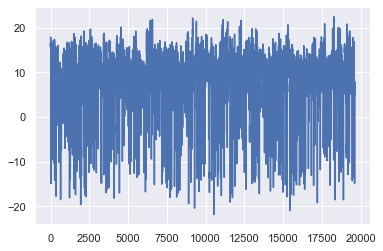

In [15]:
train_df.loc[train_df['transformers']=='M1','L1'].plot()

<AxesSubplot:>

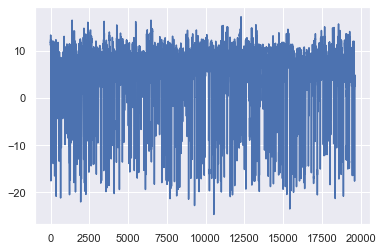

In [16]:
train_df.loc[train_df['transformers']=='M1','L2'].plot()

In [17]:
td=train_df.groupby('transformers',as_index=False)['L1'].rolling(window=3, min_periods=0).mean()

In [18]:
td

,transformers,L1
0,M1,16.477200
1,M1,16.343150
2,M1,16.198267
3,M1,15.964000
4,M1,15.785600
...,...,...
38395,M2,45.569967
38396,M2,42.847500
38397,M2,40.892833
38398,M2,38.784567


In [19]:
train_df.groupby('transformers')['L1','L2','y'].agg(['mean','std'])

L1                    L2                     y           
                   mean        std       mean        std       mean        std
transformers                                                                  
M1             7.349877   7.081236   4.270436   6.861071  13.289860   8.499420
M2            36.852028  10.017057  43.469927  12.767040  26.620563  11.627922

In [20]:
train_df[['L1','L2','L3','L4','L5','L6','y']].corr()

,L1,L2,L3,L4,L5,L6,y
L1,1.000000,0.872169,-0.295995,0.713390,0.772313,-0.207336,0.489106
L2,0.872169,1.000000,-0.542743,0.551304,0.721953,-0.538564,0.540958
L3,-0.295995,-0.542743,1.000000,0.033562,-0.261907,0.331533,-0.393832
L4,0.713390,0.551304,0.033562,1.000000,0.928394,-0.022872,0.511931
L5,0.772313,0.721953,-0.261907,0.928394,1.000000,-0.226287,0.634139
L6,-0.207336,-0.538564,0.331533,-0.022872,-0.226287,1.000000,-0.243569
y,0.489106,0.540958,-0.393832,0.511931,0.634139,-0.243569,1.000000


<AxesSubplot:>

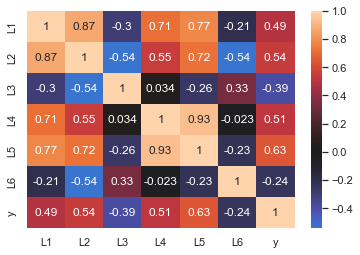

In [21]:
sns.heatmap(train_df[['L1','L2','L3','L4','L5','L6','y']].corr(),center=0,annot=True)

In [11]:
train_df['transformers'] = train_df['transformers'].map({'M1':1,'M2':2})
test_df['transformers']  = test_df['transformers'].map({'M1':1,'M2':2})
# 转换为了0-47的整数
train_df['time'] = train_df['time'].apply(lambda x:int(x.split(':')[0])*2 + int(x.split(':')[1])//30)
test_df['time']  = test_df['time'].apply(lambda x:int(x.split(':')[0])*2 + int(x.split(':')[1])//30)


In [12]:
cols = [f for f in train_df.columns if f not in ['id','date_id','y','fold']]

In [53]:
for f in [
    ['month'],['time'],['hour'],['time_span'],
    ['transformers','month'],['transformers','time'],['transformers','hour'],['transformers','time_span'],
    ['transformers','is_weekend','month'],['transformers','is_weekend','time'],['transformers','is_weekend','hour'],['transformers','is_weekend','time_span']
]:
    cols.remove('_'.join(f) + '_L2_mean')

In [54]:
cols

['transformers',
 'month',
 'is_weekend',
 'time',
 'L1',
 'L2',
 'L3',
 'L4',
 'L5',
 'L6',
 'hour',
 'time_span',
 'month_y_mean',
 'time_y_mean',
 'hour_y_mean',
 'time_span_y_mean',
 'transformers_month_y_mean',
 'transformers_time_y_mean',
 'transformers_hour_y_mean',
 'transformers_time_span_y_mean',
 'transformers_is_weekend_month_y_mean',
 'transformers_is_weekend_time_y_mean',
 'transformers_is_weekend_hour_y_mean',
 'transformers_is_weekend_time_span_y_mean',
 'month_L1_mean',
 'month_L5_mean',
 'time_L1_mean',
 'time_L5_mean',
 'hour_L1_mean',
 'hour_L5_mean',
 'time_span_L1_mean',
 'time_span_L5_mean',
 'transformers_month_L1_mean',
 'transformers_month_L5_mean',
 'transformers_time_L1_mean',
 'transformers_time_L5_mean',
 'transformers_hour_L1_mean',
 'transformers_hour_L5_mean',
 'transformers_time_span_L1_mean',
 'transformers_time_span_L5_mean',
 'transformers_is_weekend_month_L1_mean',
 'transformers_is_weekend_month_L5_mean',
 'transformers_is_weekend_time_L1_mean',
 

In [14]:
oplgb={'reg_alpha': 0.006774857968159561, 'reg_lambda': 2.6578412248622834, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 50, 'num_leaves': 1667, 'min_child_samples': 15, 'min_data_per_groups': 85}

In [15]:
oplgb['random_state']=2023
oplgb['n_estimators'] = 20000
oplgb['metric'] = 'mae'
oplgb['cat_smooth'] = oplgb.pop('min_data_per_groups')

In [28]:
op356={'reg_alpha': 1.7602244739639532,
 'reg_lambda': 0.002120300859880373,
 'colsample_bytree': 0.7,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'max_depth': 10,
 'num_leaves': 1078,
 'min_child_samples': 3,
 'random_state': 2023,
 'n_estimators': 20000,
 'metric': 'mae',
 'cat_smooth': 71}


In [83]:
op_params_1245={'n_estimators': 20000,
      'metric': 'mae',
    'reg_alpha': 0.05793620649372722,
     'reg_lambda': 7.417321157234362,
     'colsample_bytree': 1.0,
     'subsample': 0.7,
     'learning_rate': 0.017,
     'max_depth': 20,
     'num_leaves': 743,
     'min_child_samples': 8,
     'cat_smooth': 16}

In [19]:
def cv_model(clf, train_x, train_y, test_x, seed=2023):

    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    pred = np.zeros(test_x.shape[0])

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} {}************************************'.format(str(i+1), str(seed)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]

        train_matrix = clf.Dataset(trn_x, label=trn_y)
        valid_matrix = clf.Dataset(val_x, label=val_y)

        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            # 'metric': 'mae',
            # 'num_leaves': 63,
            # 'feature_fraction': 0.8,
            # 'bagging_fraction': 0.8,
            # 'learning_rate': 0.1,
            # 'seed': seed,
            # 'n_jobs':16,
             'verbose': -1,
            # 'reg_lambda':0.2,
            # 'reg_alpha':0.1
            **oplgb
        }

        model = clf.train(params, train_matrix, 20000, valid_sets=[train_matrix, valid_matrix],
                          verbose_eval=100, early_stopping_rounds=500)
        test_pred = model.predict(test_x, num_iteration=model.best_iteration)

        pred += test_pred / kf.n_splits

    return pred

#lgb_pred = cv_model(lgb, train_df[cols].astype(float), train_df['y'], test_df[cols].astype(float))

# 提交结果


In [ ]:
lgb_predB_3 = cv_model(lgb, train_df[cols].astype(float), train_df['y'], test_dfB[cols].astype(float))

************************************ 1 2023************************************
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 1.14403	valid_1's l1: 2.04153
[1000]	training's l1: 0.862749	valid_1's l1: 1.97165
[1500]	training's l1: 0.676817	valid_1's l1: 1.93865
[2000]	training's l1: 0.537531	valid_1's l1: 1.91829
[2500]	training's l1: 0.431988	valid_1's l1: 1.90473


In [20]:
lgb_predB_4 = cv_model(lgb, train_df[cols].astype(float), train_df['y'], test_df[cols].astype(float))

************************************ 1 2023************************************
Training until validation scores don't improve for 500 rounds
[100]	training's l1: 4.96927	valid_1's l1: 5.22133
[200]	training's l1: 2.78309	valid_1's l1: 3.21037
[300]	training's l1: 1.79702	valid_1's l1: 2.42619
[400]	training's l1: 1.30222	valid_1's l1: 2.10539
[500]	training's l1: 1.0154	valid_1's l1: 1.96575
[600]	training's l1: 0.828468	valid_1's l1: 1.90015
[700]	training's l1: 0.694272	valid_1's l1: 1.86477
[800]	training's l1: 0.594843	valid_1's l1: 1.84367
[900]	training's l1: 0.525509	valid_1's l1: 1.83129
[1000]	training's l1: 0.474567	valid_1's l1: 1.82283
[1100]	training's l1: 0.434986	valid_1's l1: 1.81751
[1200]	training's l1: 0.405491	valid_1's l1: 1.81409
[1300]	training's l1: 0.380866	valid_1's l1: 1.81103
[1400]	training's l1: 0.349288	valid_1's l1: 1.80795
[1500]	training's l1: 0.320862	valid_1's l1: 1.8051
[1600]	training's l1: 0.29725	valid_1's l1: 1.80323
[1700]	training's l1: 0.274

KeyboardInterrupt: 

In [58]:
lgb_pred4 = cv_model(lgb, train_df[cols].astype(float), train_df['y'], test_dfB[cols].astype(float))

************************************ 1 2023************************************
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 1.22443	valid_1's l1: 2.07551
[1000]	training's l1: 0.791474	valid_1's l1: 1.99575
[1500]	training's l1: 0.549908	valid_1's l1: 1.97151
[2000]	training's l1: 0.397215	valid_1's l1: 1.96021
[2500]	training's l1: 0.291582	valid_1's l1: 1.95405
[3000]	training's l1: 0.217935	valid_1's l1: 1.95101
[3500]	training's l1: 0.165183	valid_1's l1: 1.9488
[4000]	training's l1: 0.125729	valid_1's l1: 1.94742
[4500]	training's l1: 0.0964999	valid_1's l1: 1.94745
Early stopping, best iteration is:
[4348]	training's l1: 0.104317	valid_1's l1: 1.94725
************************************ 2 2023************************************
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 1.22831	valid_1's l1: 2.07634
[1000]	training's l1: 0.792157	valid_1's l1: 2.00367
[1500]	training's l1: 0.549473	valid_1's l1: 1.98

In [89]:
lgb_pred_f1245=cv_model(lgb, train_df[cols].astype(float), train_df['y'], test_df[cols].astype(float))

************************************ 1 2023************************************
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 0.80959	valid_1's l1: 1.95047
[1000]	training's l1: 0.470789	valid_1's l1: 1.90349
[1500]	training's l1: 0.29616	valid_1's l1: 1.88933
[2000]	training's l1: 0.188976	valid_1's l1: 1.88086
[2500]	training's l1: 0.122546	valid_1's l1: 1.87667
[3000]	training's l1: 0.0801869	valid_1's l1: 1.87429
[3500]	training's l1: 0.0522012	valid_1's l1: 1.87306
[4000]	training's l1: 0.035373	valid_1's l1: 1.87243
[4500]	training's l1: 0.0239854	valid_1's l1: 1.87204
[5000]	training's l1: 0.0166158	valid_1's l1: 1.87183
[5500]	training's l1: 0.0113065	valid_1's l1: 1.87166
[6000]	training's l1: 0.00799135	valid_1's l1: 1.87159
[6500]	training's l1: 0.00576938	valid_1's l1: 1.87153
[7000]	training's l1: 0.00430911	valid_1's l1: 1.87148
[7500]	training's l1: 0.00341758	valid_1's l1: 1.87145
[8000]	training's l1: 0.00289281	valid_1's l1: 1.8714

In [64]:
def cv_model_xgb(clf, train_x, train_y, test_x, seed=2023):

    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    pred = np.zeros(test_x.shape[0])

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} {}************************************'.format(str(i+1), str(seed)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]

        #train_matrix = clf.Dataset(trn_x, label=trn_y)
        #valid_matrix = clf.Dataset(val_x, label=val_y)

        model = clf.XGBRegressor(
        #objective='reg:pseudohubererror',
        objective='reg:squarederror',
        #tree_method="hist",
        n_estimators=20000,
        learning_rate=0.01,
        max_leaves = 63,
        subsample=0.80,
        colsample_bytree=0.80,
        #max_bin=4096,
        n_jobs=2,
        eval_metric='mae'
    )
        model.fit(trn_x,trn_y,eval_set=[(val_x,val_y)],verbose=500,early_stopping_rounds=1000)

        test_pred = model.predict(test_x)

        pred += test_pred / kf.n_splits

    return pred


In [65]:
xgb2_pred = cv_model_xgb(xgb, train_df[cols].astype(float), train_df['y'], test_df[cols].astype(float))

************************************ 1 2023************************************
[0]	validation_0-mae:19.16749
[500]	validation_0-mae:2.78016
[1000]	validation_0-mae:2.58629
[1500]	validation_0-mae:2.46654
[2000]	validation_0-mae:2.38228
[2500]	validation_0-mae:2.31971
[3000]	validation_0-mae:2.27236
[3500]	validation_0-mae:2.23441
[4000]	validation_0-mae:2.20440
[4500]	validation_0-mae:2.17875
[5000]	validation_0-mae:2.15778
[5500]	validation_0-mae:2.13849
[6000]	validation_0-mae:2.12326
[6500]	validation_0-mae:2.10912
[7000]	validation_0-mae:2.09746
[7500]	validation_0-mae:2.08601
[8000]	validation_0-mae:2.07721
[8500]	validation_0-mae:2.06723
[9000]	validation_0-mae:2.05962
[9500]	validation_0-mae:2.05262
[10000]	validation_0-mae:2.04633
[10500]	validation_0-mae:2.03986
[11000]	validation_0-mae:2.03450
[11500]	validation_0-mae:2.02904
[12000]	validation_0-mae:2.02483
[12500]	validation_0-mae:2.02005
[13000]	validation_0-mae:2.01595
[13500]	validation_0-mae:2.01249
[14000]	validation_

In [37]:
xgb_pred

array([11.02171683, 11.32929611, 10.02444696, ..., 20.07470345,
       18.11297154, 18.27725458])

In [38]:
lgb_pred

array([ 9.67418924, 13.79349218, 10.81011688, ..., 22.30349347,
       20.06205575, 16.60616122])

In [49]:
train_df[cols]

,transformers,month,is_weekend,time,L1,L2,L3,L4,L5,L6,...,hour_L1_mean,time_span_L1_mean,transformers_month_L1_mean,transformers_time_L1_mean,transformers_hour_L1_mean,transformers_time_span_L1_mean,transformers_is_weekend_month_L1_mean,transformers_is_weekend_time_L1_mean,transformers_is_weekend_hour_L1_mean,transformers_is_weekend_time_span_L1_mean
0,1,4,0,0,16.4772,11.6558,4.4320,6.4635,4.3713,1.1885,...,23.190594,22.417344,5.147846,12.028731,11.981487,11.504955,5.39687,12.029595,11.969085,11.553994
1,1,4,0,1,16.2091,11.8867,4.4020,6.4640,4.6197,1.1879,...,23.313253,22.625739,5.018662,11.930317,12.107395,11.559884,5.537005,11.990083,12.147907,11.630435
2,1,4,0,2,15.9085,11.5495,4.3407,6.5308,4.0870,1.1272,...,22.714622,22.417344,5.147846,11.939182,11.780982,11.504955,5.39687,11.97623,11.829212,11.553994
3,1,4,0,3,15.7744,11.3179,4.2491,6.0959,4.1756,1.0818,...,23.005002,22.625739,5.018662,11.756876,11.799912,11.559884,5.537005,11.868639,11.893383,11.630435
4,1,4,0,4,15.6739,11.4603,4.3714,6.6315,4.2463,1.1573,...,22.229171,22.417344,5.147846,11.290373,11.313791,11.504955,5.39687,11.337238,11.377231,11.553994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,2,1,0,43,43.9366,46.8299,-2.7134,0.0004,0.0002,0.0005,...,24.739573,24.534024,42.292738,40.291291,40.665192,39.20057,42.297914,40.241985,40.731077,39.18357
38396,2,1,0,44,39.6642,42.7015,-2.6810,0.0004,-1.6484,0.0004,...,24.44941,24.534024,42.292738,39.313877,38.938258,39.20057,42.297914,39.193854,38.791706,39.18357
38397,2,1,0,45,39.0777,42.2995,-2.8787,0.0004,-0.7773,0.0001,...,24.862673,24.428468,42.11679,38.841311,39.246081,39.25772,42.045286,38.781997,39.27004,39.322831
38398,2,1,0,46,37.6118,41.4551,-2.8789,0.0004,0.0000,0.0001,...,24.173229,24.509555,42.129412,37.29602,36.783205,39.258562,42.037152,37.093707,36.554454,39.219341


In [ ]:

def train_model(X, X_test, y, params, folds, model_type='lgb', eval_type='regression'):
    #生成一个和训练集样本量一样大的空数列，用来存放交叉验证中的小模型在训练集上的预测值，以后会在stacking中用到这些数据
    oof = np.zeros(X.shape[0])
    #存放测试集的预测结果
    predictions = np.zeros(X_test.shape[0])#
    scores = []
    #enumerate(folds.split(X, y))返回第i折的测试集索引trn_idx、验证集索引val_idx
    for fold_n, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
        print('Fold', fold_n, 'started at', time.ctime())

        if model_type == 'lgb':
            #lightgbm要封装数据
            trn_data = lgb.Dataset(X[trn_idx], y[trn_idx])
            val_data = lgb.Dataset(X[val_idx], y[val_idx])
            #实例化一个lightgbm模型clf，在第i折的训练集上训练模型
            clf = lgb.train(params, trn_data, num_boost_round=20000,
                            valid_sets=[trn_data, val_data],
                            verbose_eval=100, early_stopping_rounds=300)
            #实例化后的模型clf在第i折的验证集上预测，并按照索引放在空数列里面，以后的stacking过程中会用到。
            oof[val_idx] = clf.predict(X[val_idx], num_iteration=clf.best_iteration)
            #在测试集上预测，将预测值除以折数，因为最终的模型预测值输出的是几个小模型预测值的平均值。
            predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

        if model_type == 'xgb':
            trn_data = xgb.DMatrix(X[trn_idx], y[trn_idx])
            val_data = xgb.DMatrix(X[val_idx], y[val_idx])
            watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
            clf = xgb.train(dtrain=trn_data, num_boost_round=20000,
                            evals=watchlist, early_stopping_rounds=200,
                            verbose_eval=100, params=params)
            oof[val_idx] = clf.predict(xgb.DMatrix(X[val_idx]), ntree_limit=clf.best_ntree_limit)
            predictions += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits

        if (model_type == 'cat') and (eval_type == 'regression'):
            clf = CatBoostRegressor(iterations=20000, eval_metric='RMSE', **params)
            clf.fit(X[trn_idx], y[trn_idx],
                    eval_set=(X[val_idx], y[val_idx]),
                    cat_features=[], use_best_model=True, verbose=100)
            oof[val_idx] = clf.predict(X[val_idx])
            predictions += clf.predict(X_test) / folds.n_splits

        if (model_type == 'cat') and (eval_type == 'binary'):
            clf = CatBoostClassifier(iterations=20000, eval_metric='Logloss', **params)
            clf.fit(X[trn_idx], y[trn_idx],
                    eval_set=(X[val_idx], y[val_idx]),
                    cat_features=[], use_best_model=True, verbose=100)
            oof[val_idx] = clf.predict_proba(X[val_idx])[:,1]
            predictions += clf.predict_proba(X_test)[:,1] / folds.n_splits
        print(predictions)
        if eval_type == 'regression':
            scores.append(mean_squared_error(oof[val_idx], y[val_idx])**0.5)
        if eval_type == 'binary':
            scores.append(log_loss(y[val_idx], oof[val_idx]))

    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

    return oof, predictions, scores


In [ ]:
test_df['y'] = lgb_predB_4
test_df[['id','y']].to_csv('submitB4.csv', index=False)